In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드

In [2]:
train = pd.read_csv('C:/Users/wnrrh/desktop/dacon/penguin/train.csv')
test = pd.read_csv('C:/Users/wnrrh/desktop/dacon/penguin/test.csv')
ss = pd.read_csv('C:/Users/wnrrh/desktop/dacon/penguin/sample_submission.csv')

In [3]:
train.drop(['id'],axis=1, inplace=True)
test.drop(['id'],axis=1, inplace=True)

In [4]:
train

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
...,...,...,...,...,...,...,...,...,...,...
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700
110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.11006,-25.79549,4250
111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.97025,-26.03679,4100
112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.80589,-24.73735,2700


# object 타입 개수 확인

In [496]:
ob_cols = train.dtypes[train.dtypes == 'object'].index.tolist()
for i in ob_cols:
    print('i:', i)
    print(train[i].value_counts(),'\n')

i: Species
Gentoo penguin (Pygoscelis papua)            48
Adelie Penguin (Pygoscelis adeliae)          41
Chinstrap penguin (Pygoscelis antarctica)    25
Name: Species, dtype: int64 

i: Island
Biscoe       57
Dream        44
Torgersen    13
Name: Island, dtype: int64 

i: Clutch Completion
Yes    102
No      12
Name: Clutch Completion, dtype: int64 

i: Sex
MALE      56
FEMALE    55
Name: Sex, dtype: int64 



# EDA - 탐색적 데이터 분석

<AxesSubplot:xlabel='Species', ylabel='Body Mass (g)'>

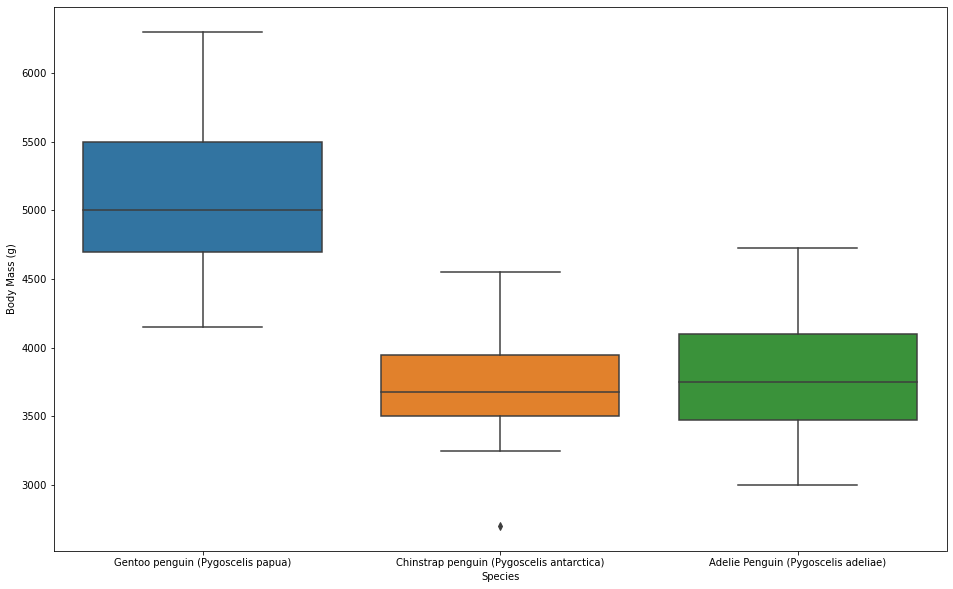

In [497]:
# 품종에 따른 몸무게 분포 
_ , ax = plt.subplots(1, 1, figsize=(16, 10))
sns.boxplot(data=train, x=train['Species'], y='Body Mass (g)', ax=ax)

Species 가 Chinstrap penguin인 경우 이상치 1개 존재.
품종에 따른 몸무게 차이가 존재

<AxesSubplot:xlabel='Island', ylabel='Body Mass (g)'>

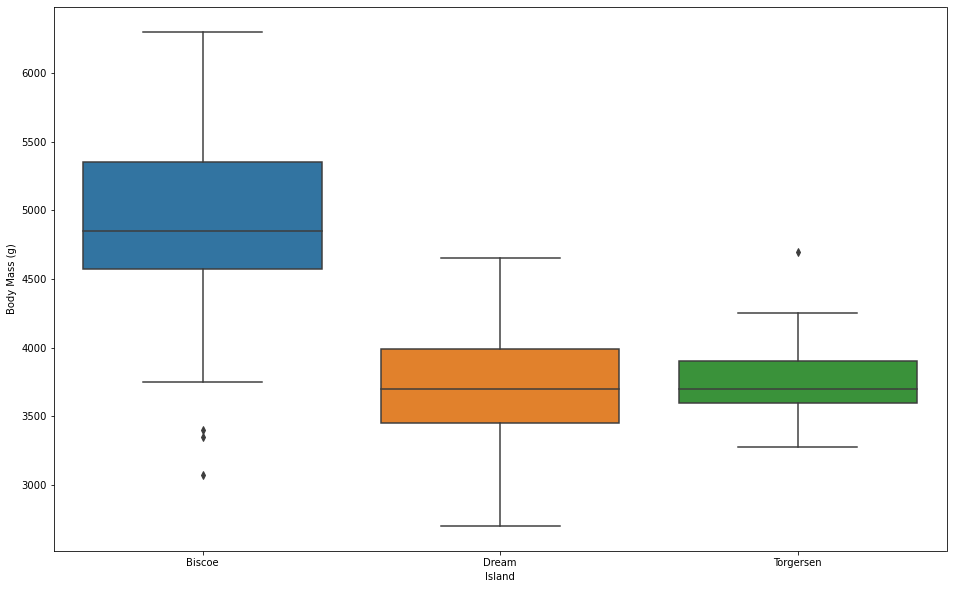

In [498]:
# 섬에 따른 몸무게 분포 확인
_ , ax = plt.subplots(1, 1, figsize=(16, 10))
sns.boxplot(data=train, x=train['Island'], y='Body Mass (g)', ax=ax)

Island의 경우 Dream island를 제외하고 이상치가 존재. 
서식하는 섬에 따라 몸무게 분포가 약간 상이 Biscoe의 경우 몸무게가 더 나가는 경향 존재

<AxesSubplot:xlabel='Clutch Completion', ylabel='Body Mass (g)'>

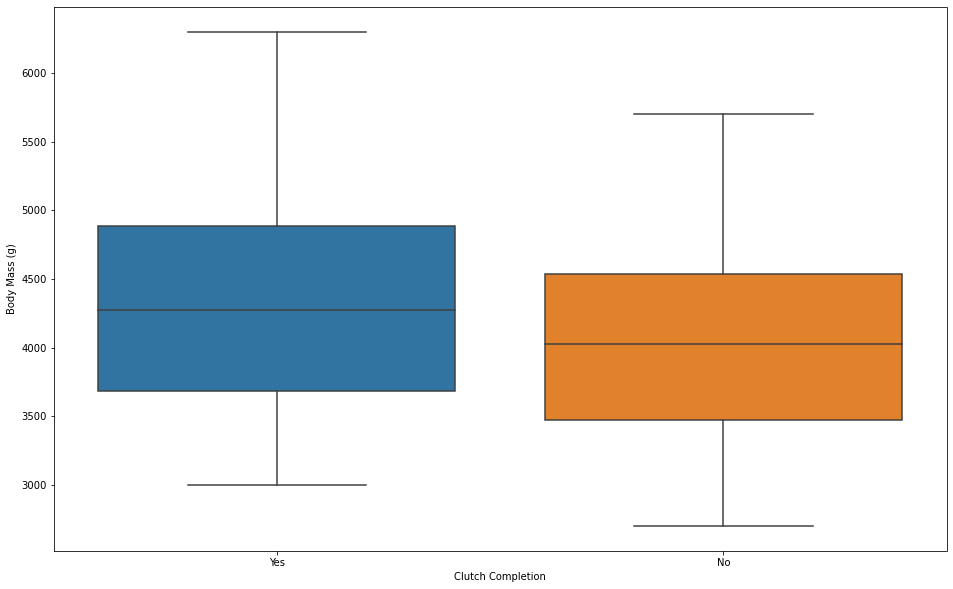

In [499]:
# 둥지 알 여부가 Full Clutch에 따른 몸무게 분포 확인
_ , ax = plt.subplots(1, 1, figsize=(16, 10))
sns.boxplot(data=train, x=train['Clutch Completion'], y='Body Mass (g)', ax=ax)

큰 차이 없음. (둥지에 알이 2개 이상인 경우 더 나가는 편)

<AxesSubplot:xlabel='Sex', ylabel='Body Mass (g)'>

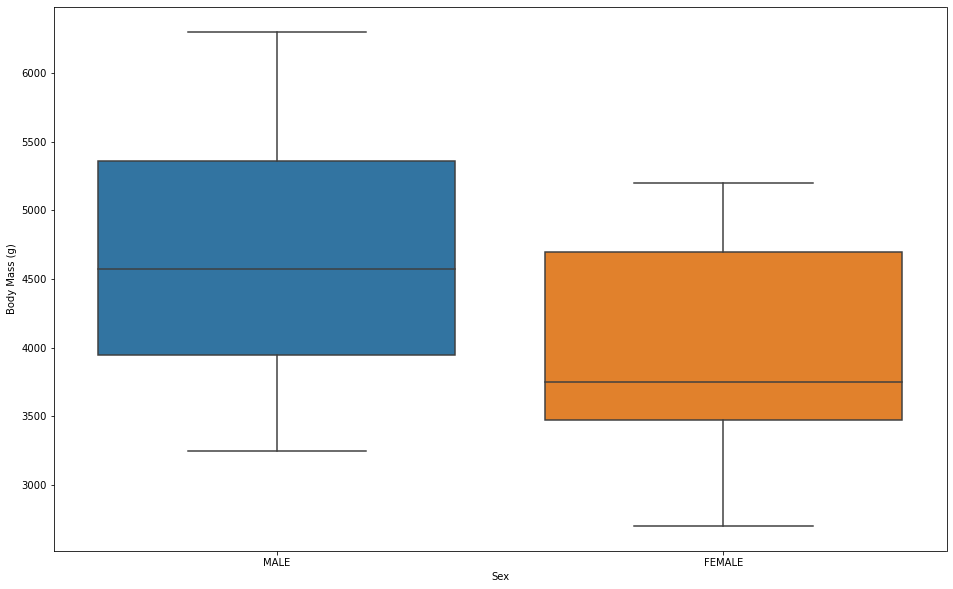

In [500]:
# 성별에 따른 몸무게 분포 확인
_ , ax = plt.subplots(1, 1, figsize=(16, 10))
sns.boxplot(data=train, x=train['Sex'], y='Body Mass (g)', ax=ax)

남성의 경우 몸무게 평균이 500g 정도 더 나가는 편 5500g 이상인 경우 펭귄 성별은 남성으로 판단.

<Figure size 1800x1800 with 0 Axes>

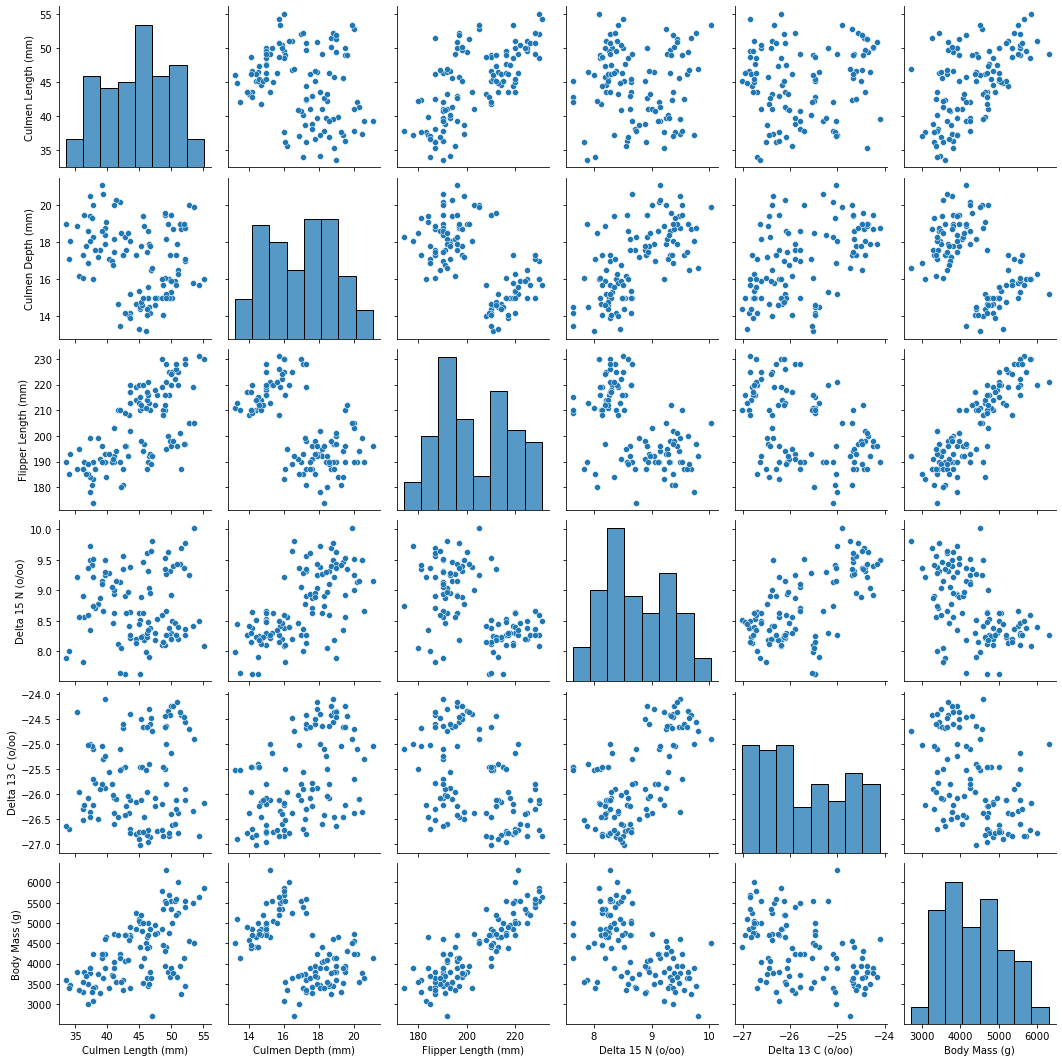

In [501]:
# 변수 사이의 상관관계 분석
plt.figure(figsize=(25,25))
sns.pairplot(train)

In [502]:
train.corr()['Body Mass (g)']

Culmen Length (mm)     0.572063
Culmen Depth (mm)     -0.490643
Flipper Length (mm)    0.864814
Delta 15 N (o/oo)     -0.548678
Delta 13 C (o/oo)     -0.468425
Body Mass (g)          1.000000
Name: Body Mass (g), dtype: float64

In [14]:
train['Flipper Length (mm)']

0      220
1      200
2      210
3      214
4      225
      ... 
109    185
110    190
111    192
112    192
113    228
Name: Flipper Length (mm), Length: 114, dtype: int64

# 결측치 확인

In [503]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.


In [504]:
# 결측치 raw 확인
train[train.isna().sum(axis=1) > 0]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


In [505]:
# 범주형 데이터 행 삭제(성별은 몸무게와 분포 차이 없다고 판단) / 수치형 데이터 평균값 대입
def handle_na(train,missing_col):
    temp = train.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            temp = temp.dropna(subset=[col])
        elif dtype == int or dtype == float:
            temp.loc[:,col] = temp[col].fillna(temp[col].mean())
    return temp
train = handle_na(train,missing_col)
missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


# 데이터 분포 확인

In [506]:
train.describe()
train.info()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,44.717117,17.000000,203.162162,8.738543,-25.718804,4333.333333
std,5.290899,1.925192,14.731253,0.564470,0.851332,787.518639
min,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,40.450000,15.250000,190.000000,8.274020,-26.408475,3675.000000
50%,45.200000,17.200000,199.000000,8.634880,-25.898340,4250.000000
75%,49.150000,18.600000,216.000000,9.264635,-25.005945,4875.000000
max,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


# 데이터 타입 확인 및 Encoding

In [507]:
train.dtypes

Species                 object
Island                  object
Clutch Completion       object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)      int64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Body Mass (g)            int64
dtype: object

In [18]:
# 범주형 변수 인코딩
train = pd.get_dummies(train,columns=['Species','Island','Clutch Completion'])

In [19]:
train

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes
0,0,50.0,15.3,220,MALE,8.30515,-25.19017,5550,0,0,1,1,0,0,0,1
1,1,49.5,19.0,200,MALE,9.63074,-24.34684,3800,0,1,0,0,1,0,1,0
2,2,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400,0,0,1,1,0,0,0,1
3,3,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850,0,0,1,1,0,0,0,1
4,4,49.6,16.0,225,MALE,8.38324,-26.84272,5700,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,109,36.6,17.8,185,FEMALE,NaN,NaN,3700,1,0,0,0,0,1,0,1
110,110,39.2,18.6,190,MALE,9.11006,-25.79549,4250,1,0,0,0,1,0,0,1
111,111,43.2,18.5,192,MALE,8.97025,-26.03679,4100,1,0,0,0,1,0,0,1
112,112,46.9,16.6,192,FEMALE,9.80589,-24.73735,2700,0,1,0,0,1,0,1,0


In [509]:
# 인덱스 리셋
train = train.reset_index(drop=True)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


In [511]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Culmen Length (mm)                                 111 non-null    float64
 1   Culmen Depth (mm)                                  111 non-null    float64
 2   Flipper Length (mm)                                111 non-null    int64  
 3   Sex                                                111 non-null    object 
 4   Delta 15 N (o/oo)                                  111 non-null    float64
 5   Delta 13 C (o/oo)                                  111 non-null    float64
 6   Body Mass (g)                                      111 non-null    int64  
 7   Species_Adelie Penguin (Pygoscelis adeliae)        111 non-null    uint8  
 8   Species_Chinstrap penguin (Pygoscelis antarctica)  111 non-null    uint8  
 9   Species_Ge

# 테스트셋에도 적용

In [512]:
# 위 과정을 테스트셋에도 적용
missing_col_test = check_missing_col(test)

결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 6개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 9개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 8개의 결측치가 존재합니다.


In [513]:
# 결측치 raw 확인
test[test.isna().sum(axis=1) > 0]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
27,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,38.6,21.2,191.0,MALE,NaN,NaN
46,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.1,186.0,NaN,8.63243,-25.21315
75,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,51.9,19.5,206.0,MALE,NaN,-23.78767
81,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,37.5,18.9,179.0,NaN,NaN,NaN
98,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,13.8,216.0,NaN,8.25818,-26.23886
106,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,15.3,222.0,MALE,NaN,NaN
152,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,15.7,217.0,NaN,8.04111,-26.18444
159,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,41.1,17.6,182.0,FEMALE,NaN,NaN
175,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,40.8,18.4,195.0,MALE,NaN,NaN
202,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,MALE,NaN,NaN


In [514]:
test = test.reset_index(drop=True)
test

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837
...,...,...,...,...,...,...,...,...,...
223,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,49.3,19.9,203.0,MALE,9.88809,-24.59513
224,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.5,14.8,217.0,FEMALE,8.58487,-26.59290
225,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.5,13.5,210.0,FEMALE,7.99530,-25.32829
226,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,50.5,19.6,201.0,MALE,9.80590,-24.72940


In [515]:
# 범주형 변수 인코딩
test = pd.get_dummies(test,columns=['Species','Island','Clutch Completion'])

In [516]:
# y_test값 생성
test['Body Mass (g)'] = 0

# Modeling - Regression

In [517]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Culmen Length (mm)                                 111 non-null    float64
 1   Culmen Depth (mm)                                  111 non-null    float64
 2   Flipper Length (mm)                                111 non-null    int64  
 3   Sex                                                111 non-null    object 
 4   Delta 15 N (o/oo)                                  111 non-null    float64
 5   Delta 13 C (o/oo)                                  111 non-null    float64
 6   Body Mass (g)                                      111 non-null    int64  
 7   Species_Adelie Penguin (Pygoscelis adeliae)        111 non-null    uint8  
 8   Species_Chinstrap penguin (Pygoscelis antarctica)  111 non-null    uint8  
 9   Species_Ge

In [518]:
# pip install xgboost

In [519]:
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

앞서 EDA를 통해 성별과 동위원소 컬럼은 몸무게에 큰 영향을 끼치지 않는 것으로 파악함

In [534]:
X = train.drop(['Body Mass (g)','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)'],axis=1,inplace=False)
y = train['Body Mass (g)']

In [535]:
test_x = test.drop(['Body Mass (g)','Sex','Delta 15 N (o/oo)','Delta 13 C (o/oo)'],axis=1,inplace=False)
test_y = test['Body Mass (g)']

In [536]:
# 트레이닝, 테스트 구분 비율 8:2
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [537]:
pipe = Pipeline([('regressor', RandomForestRegressor())])
search_space = [
                {
                 'regressor': [RandomForestRegressor(random_state=0)],
                 'regressor__n_estimators': [100, 150, 200],
                 'regressor__max_depth': [3, 4, 5]
                },
                
                {
                 'regressor': [XGBRegressor()],
                 'regressor__max_depth': [3],
                 'regressor__n_estimators': [300],
                 'regressor__eta': [0.02, 0.1],
                 'regressor__subsample': [0.5, 0.6],
                 'regressor__seed':[0]
                },
                
                {
                 'regressor': [DecisionTreeRegressor(random_state=0)],
                 'regressor__min_samples_split':[3, 4, 5],
                 'regressor__max_depth': [3, 4, 5]
                }
               ]

In [538]:
kf = KFold(n_splits=9,random_state=None)
grid_search = GridSearchCV(pipe,search_space, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train.values.ravel())

print('best params:', grid_search.best_params_)
print('best estimator:', grid_search.best_estimator_)
print('best rmse :', sqrt(-(grid_search.best_score_)))

best params: {'regressor': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, eta=0.02, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, seed=0, subsample=0.6, tree_method=None,
             validate_parameters=None, verbosity=None), 'regressor__eta': 0.02, 'regressor__max_depth': 3, 'regressor__n_estimators': 300, 'regressor__seed': 0, 'regressor__subsample': 0.6}
best estimator: Pipeline(steps=[('regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsampl

# 예측 값 출력

In [539]:
y_test_pred = pd.DataFrame(grid_search.best_estimator_.predict(test_x), columns=['Body Mass (g)'])
y_test_pred = pd.concat([y_test_pred], axis=1)

In [540]:
ss['Body Mass (g)'] = y_test_pred

In [541]:
ss

,id,Body Mass (g)
0,0,4275.368164
1,1,5524.661621
2,2,3911.775635
3,3,3293.814941
4,4,3485.616943
...,...,...
223,223,4211.566895
224,224,4801.729004
225,225,4371.781738
226,226,3847.726318


In [542]:
ss.to_csv('C:/Users/wnrrh/desktop/dacon/penguin/submission.csv',index=False)

In [ ]:
# 오버샘플링 고려해보기

# 데이터 개수 111개로는 데이터 학습이 힘들다고 판단. >> 오버샘플링 적용
from imlearn.over_sampling import SMOTE

smote = SMOTE(random_state=11)
x_train_over, y_train_over = smote.fit_sample(X,y)